In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import exposure, filters, restoration, img_as_float
from skimage.util import random_noise

1.1 CLAHE

/tmp/ipython-input-2830047217.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2, 2, 3), plt.hist(img.ravel(), 256, [0,256]), plt.title('Original')
/tmp/ipython-input-2830047217.py:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2, 2, 4), plt.hist(clahe_img.ravel(), 256, [0,256]), plt.title('CLAHE Histogram')


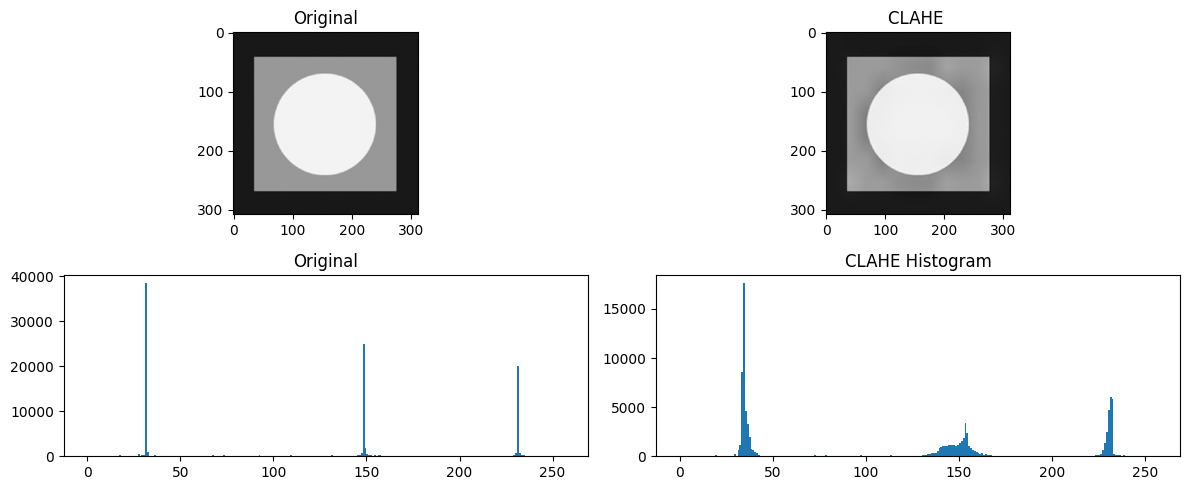

In [ ]:
img = cv2.imread('original_image.jpg', 0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(12,8))
clahe_img = clahe.apply(img)

plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(2, 2, 2), plt.imshow(clahe_img, cmap='gray'), plt.title('CLAHE ')
plt.subplot(2, 2, 3), plt.hist(img.ravel(), 256, [0,256]), plt.title('Original')
plt.subplot(2, 2, 4), plt.hist(clahe_img.ravel(), 256, [0,256]), plt.title('CLAHE Histogram')
plt.tight_layout()
plt.show()

1.2  Homomorphic Filtering

In [ ]:
image = cv2.imread('homomorphic.jpg', 0)

img_log = np.log1p(np.array(image, dtype="float"))
dft = np.fft.fft2(img_log)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
y, x = np.ogrid[-crow:rows-crow, -ccol:cols-ccol]

d2 = x*x + y*y
h_filter = (2.0 - 0.5) * (1 - np.exp(-1 * (d2 / (30**2)))) + 0.5

filtered_dft = dft_shift * h_filter
i_shift = np.fft.ifftshift(filtered_dft)
i_dft = np.fft.ifft2(i_shift)
img_back = np.exp(np.real(i_dft)) - 1
result = np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

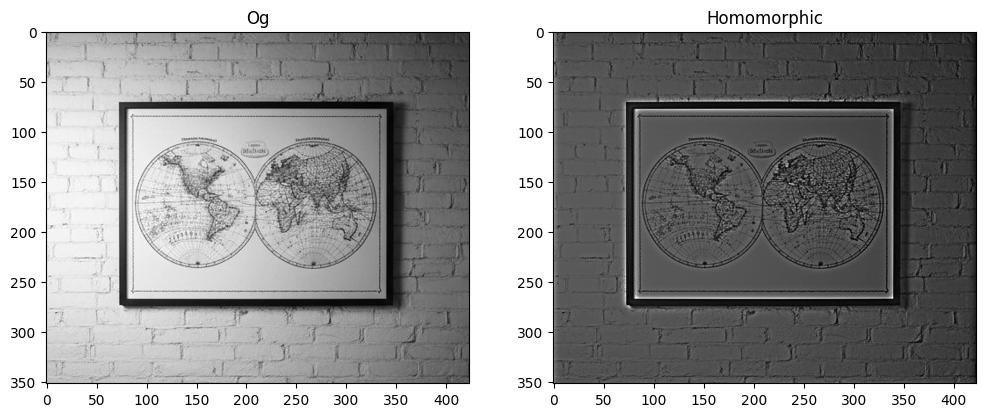

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Og')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Homomorphic')
plt.show()

1.3 Local Gamma

In [ ]:
image = cv2.imread('local_gamma.jpg', 0)

img_float = image.astype(np.float32) / 255.0

block_size = 64
gamma = 0.5
rows, cols = image.shape

corrected = np.zeros_like(img_float)

for i in range(0, rows, block_size):
    for j in range(0, cols, block_size):
        block = img_float[i:min(i+block_size, rows), j:min(j+block_size, cols)]
        local_mean = np.mean(block)
        adaptive_gamma = gamma + (1 - local_mean) * 0.5
        block_corrected = np.power(block, adaptive_gamma)
        corrected[i:min(i+block_size, rows), j:min(j+block_size, cols)] = block_corrected

corrected = (np.clip(corrected, 0, 1) * 255).astype(np.uint8)

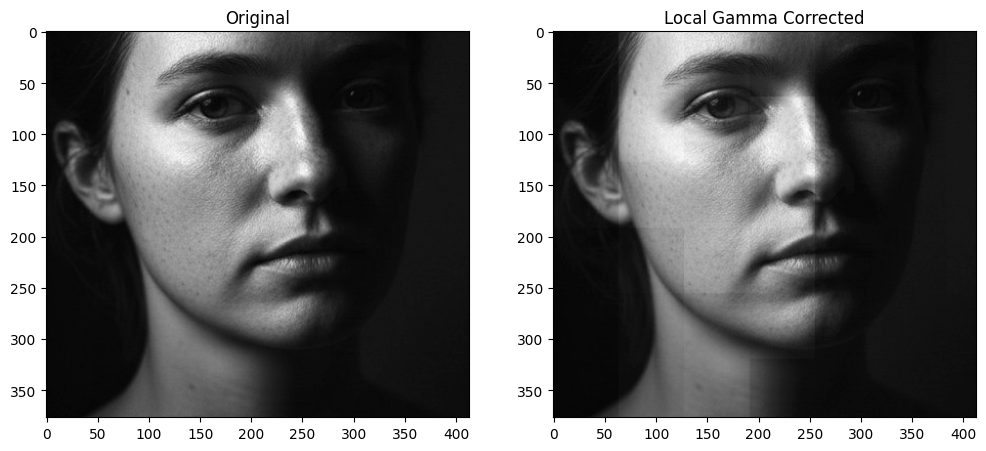

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(corrected, cmap='gray'), plt.title('Local Gamma Corrected')
plt.show()

2.1 Add Gaussian Noise and Filter and Histogram

In [ ]:
image = cv2.imread('original_image.jpg', 0)

mean, var = 0, 0.01
sigma = var ** 0.8
gaussian_noise = np.random.normal(mean, sigma, image.shape)
noisy = np.clip(image.astype(np.float32) + gaussian_noise * 255, 0, 255).astype(np.uint8)

filtered = cv2.GaussianBlur(noisy, (5, 5), 0)

/tmp/ipython-input-2685513577.py:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(234), plt.hist(image.ravel(), 256, [0,256]), plt.title('Original Histogram')
/tmp/ipython-input-2685513577.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(235), plt.hist(noisy.ravel(), 256, [0,256]), plt.title('Noisy Histogram')
/tmp/ipython-input-2685513577.py:7: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(236), plt.hist(filtered.ravel(), 256, [0,256]), plt.title('Filtered Histogram')


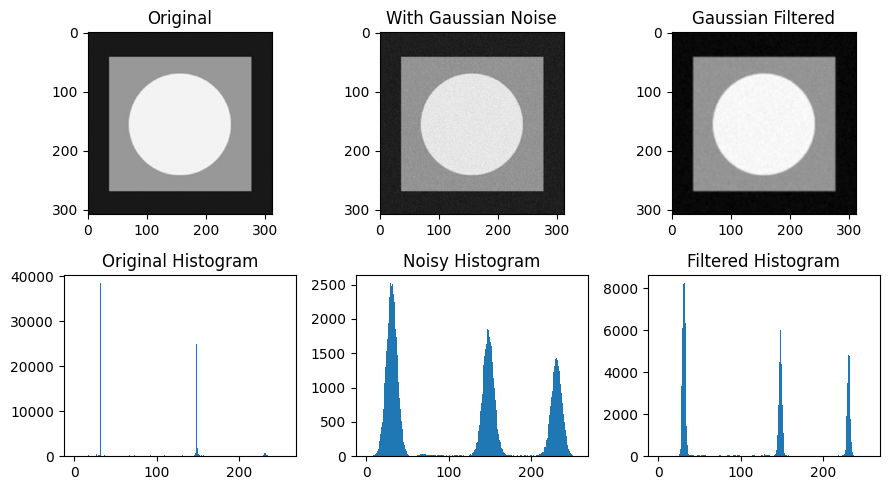

In [ ]:
plt.figure(figsize=(9, 5))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(noisy, cmap='gray'), plt.title('With Gaussian Noise')
plt.subplot(233), plt.imshow(filtered, cmap='gray'), plt.title('Gaussian Filtered')
plt.subplot(234), plt.hist(image.ravel(), 256, [0,256]), plt.title('Original Histogram')
plt.subplot(235), plt.hist(noisy.ravel(), 256, [0,256]), plt.title('Noisy Histogram')
plt.subplot(236), plt.hist(filtered.ravel(), 256, [0,256]), plt.title('Filtered Histogram')
plt.tight_layout()
plt.show()

2.2 Salt and Pepper

In [7]:
img = cv2.imread("original_image.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_norm = img_rgb / 255.0

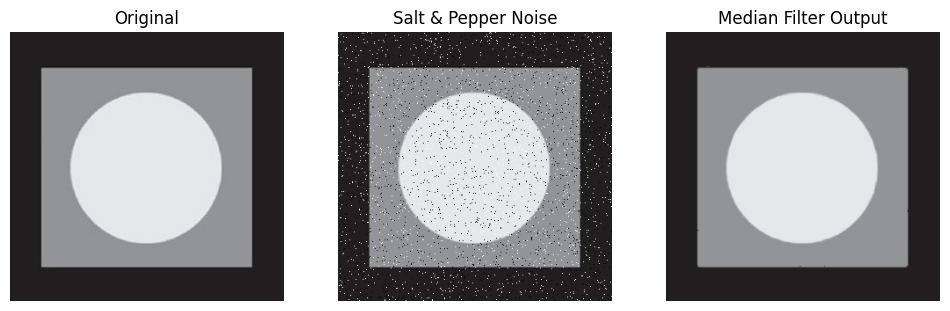

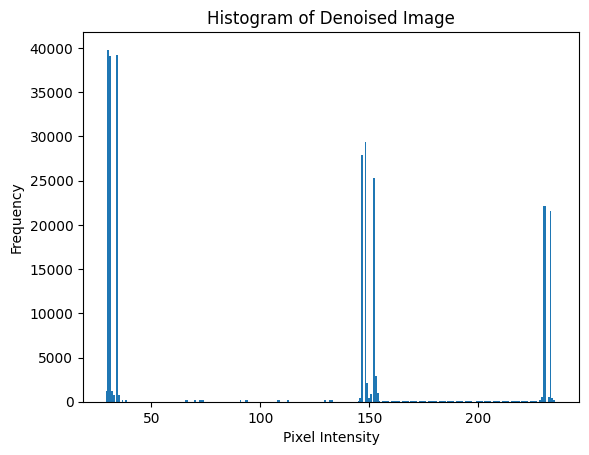

In [8]:
noisy_img = img_rgb.copy()
rows, cols, ch = noisy_img.shape
total_pixels = rows * cols

#(white)
num_salt = int(total_pixels * 0.02)
salt_x = np.random.randint(0, rows, num_salt)
salt_y = np.random.randint(0, cols, num_salt)
noisy_img[salt_x, salt_y] = 255

#(black)
num_pepper = int(total_pixels * 0.02)
pepper_x = np.random.randint(0, rows, num_pepper)
pepper_y = np.random.randint(0, cols, num_pepper)
noisy_img[pepper_x, pepper_y] = 0

denoised = cv2.medianBlur(noisy_img, 5)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(noisy_img)
plt.title("Salt & Pepper Noise")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(denoised)
plt.title("Median Filter Output")
plt.axis("off")

plt.show()

plt.figure()
plt.hist(denoised.ravel(), bins=256)
plt.title("Histogram of Denoised Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


2.3 Shot Noise


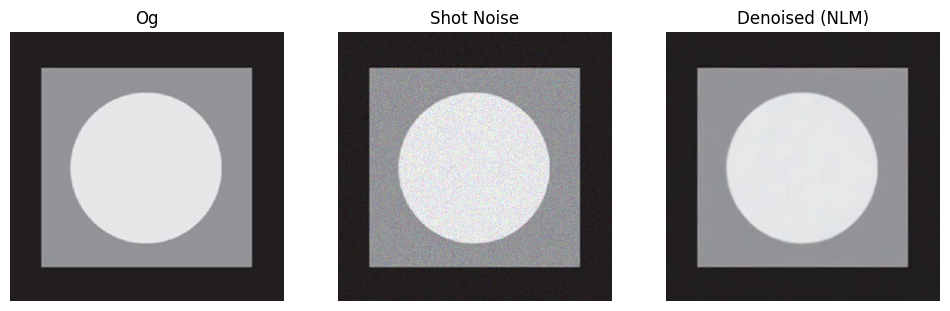

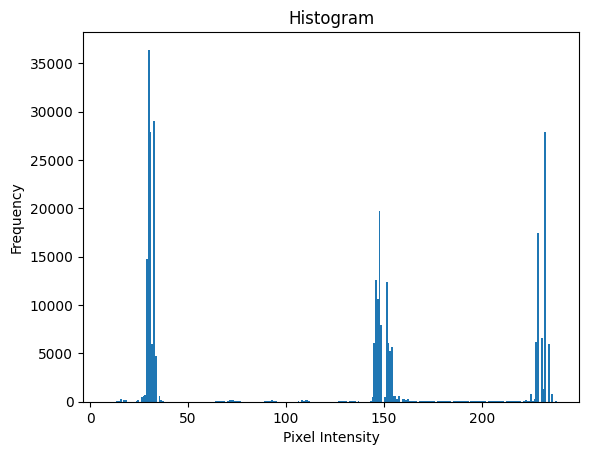

In [9]:
noisy = np.random.poisson(img_norm * 255) / 255.0
noisy = np.clip(noisy, 0, 1)
noisy_img = (noisy * 255).astype(np.uint8)

denoised = cv2.fastNlMeansDenoisingColored(
    noisy_img,
    None,
    h=10,
    hColor=10,
    templateWindowSize=7,
    searchWindowSize=21
)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Og")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(noisy_img)
plt.title("Shot Noise")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(denoised)
plt.title("Denoised (NLM)")
plt.axis("off")

plt.show()

plt.figure()
plt.hist(denoised.ravel(), bins=256)
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()
